In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import minimize
%matplotlib inline

In [3]:
N = 100
rMax = 8
samples = 400

def deriv(phi):
    dphi = np.zeros(len(phi))
    dphi[0:-1] = np.diff(phi)/np.diff(r)
    dphi[-1] = (phi[-1] - phi[-2])/(r[-1] - r[-2])
    return dphi

def innerProd(u, v, r):
    integrand = 2*np.pi*r*u*v
    return np.trapz(integrand, r)

def projection(u, v, r):
    return (innerProd(u, v, r)/innerProd(u, u, r))*u

def gramSchmidt(vectors, r = np.linspace(0, rMax, samples)):
    orthoNorm = []
    for i in range(len(vectors)):
        for j in range(len(orthoNorm)):
            vectors[i] = vectors[i] -  projection(orthoNorm[j], vectors[i], r)
        orthoNorm.append(vectors[i]/np.sqrt(innerProd(vectors[i], vectors[i], r)))
    return np.array(orthoNorm)

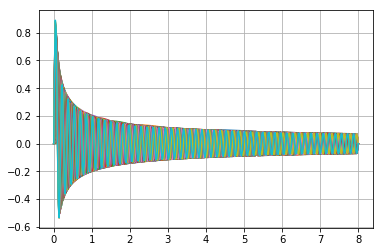

In [4]:
rMax = 8
r = np.linspace(0, rMax, samples)
basisNew = [np.sin(np.pi*n*r/rMax) for n in range(1, N + 1)]
orthNormNew = gramSchmidt(basisNew, r)
for el in orthNormNew:
    plt.plot(r, el)
plt.grid()

In [5]:
def approxSoln(var, basis):
    if len(var) != N:
        print('variational vector not of correct size')
    else:
        approx = np.zeros(samples)
        for i in range(len(var)):
            approx += var[i]*basis[i]
        return approx

In [6]:
Q0 = 10*np.pi
guess = np.array([np.sqrt(Q0/N) for i in range(N)])
print(guess)
temp = sum(guess**2)
print(temp)
approx = approxSoln(guess, orthNormNew)
innerProd(approx, approx, r)

[ 0.56049912  0.56049912  0.56049912  0.56049912  0.56049912  0.56049912
  0.56049912  0.56049912  0.56049912  0.56049912  0.56049912  0.56049912
  0.56049912  0.56049912  0.56049912  0.56049912  0.56049912  0.56049912
  0.56049912  0.56049912  0.56049912  0.56049912  0.56049912  0.56049912
  0.56049912  0.56049912  0.56049912  0.56049912  0.56049912  0.56049912
  0.56049912  0.56049912  0.56049912  0.56049912  0.56049912  0.56049912
  0.56049912  0.56049912  0.56049912  0.56049912  0.56049912  0.56049912
  0.56049912  0.56049912  0.56049912  0.56049912  0.56049912  0.56049912
  0.56049912  0.56049912  0.56049912  0.56049912  0.56049912  0.56049912
  0.56049912  0.56049912  0.56049912  0.56049912  0.56049912  0.56049912
  0.56049912  0.56049912  0.56049912  0.56049912  0.56049912  0.56049912
  0.56049912  0.56049912  0.56049912  0.56049912  0.56049912  0.56049912
  0.56049912  0.56049912  0.56049912  0.56049912  0.56049912  0.56049912
  0.56049912  0.56049912  0.56049912  0.56049912  0

31.415926535897931

In [7]:
alpha = 0.1
n = 1

def functional2(varVector):
    phi = approxSoln(varVector, orthNormNew)
    dphi = deriv(phi)
    kinetic1 = r*(dphi**2)
    kinetic2 = (n**2)*(phi**2)[1:]/r[1:]
    kinetic2 = np.insert(kinetic2,0,0)
    kinetic = kinetic1 + kinetic2
    potential1 = -2*r*phi**2/alpha
    potential2 = 2*r*np.log(1 + alpha*phi**2)/alpha**2
    potential = potential1 + potential2
    integrand = 0.5*(kinetic + potential)
    return np.trapz(integrand, r)

[  1.98084568e+00   3.27220357e+00   3.17469373e+00   2.25755041e+00
   1.21941680e+00   4.14438988e-01  -5.31939477e-02  -2.16843909e-01
  -2.32202654e-01  -1.76738753e-01  -1.00859461e-01  -4.49071702e-02
  -4.04977818e-03  -2.13820613e-03   1.66331384e-02   2.47617057e-03
   1.01938002e-03   2.10812329e-03  -2.15116945e-03  -1.99160556e-03
  -2.72582498e-03   1.65602308e-03  -2.12237315e-03   4.11072316e-04
  -1.72518561e-04  -4.44006090e-04  -7.43921618e-05   3.27763009e-04
   3.53916515e-04   5.14708510e-04   9.76627201e-04   1.09853599e-03
   6.73445738e-04   1.55894443e-03   1.09221671e-03   5.29825073e-04
   1.73866637e-03   6.40256275e-05   8.71079550e-04   5.79088071e-04
   7.50390851e-05   3.32021602e-04   2.68301710e-04  -2.44593597e-04
   2.80552307e-04  -1.31193550e-04  -1.94111637e-04   1.90615017e-04
  -4.04917833e-04   5.30652821e-05  -1.66943750e-04  -3.21580141e-04
   6.93545086e-05  -5.06414737e-04   5.64640087e-05  -4.63711350e-04
  -8.81138800e-05  -3.53284720e-04

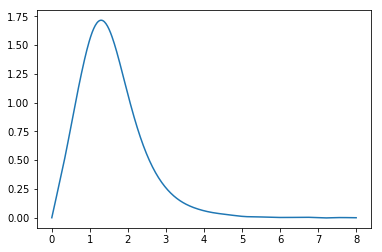

In [8]:
Q0 = 10*np.pi
guess = np.array([np.sqrt(Q0/N) for i in range(N)])

cons = ({'type': 'eq', 'fun': lambda x:  sum(x**2) - Q0})
minimum = minimize(functional2, guess, constraints = cons)
minVarVector = minimum.x
print(minVarVector)
approx = approxSoln(minVarVector, orthNormNew)
plt.plot(r, approx);